**Clustering 3 HRV features into seizure, non-seizure and noise using Gaussian Mixture Model(GMM)**         
This method is applied on features extracted from the denoised part of signal with annotation agreed by all experts.                
However, the annotation is only 2 class of seizure and non-seizure

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler   # For feature normalization 
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
#read data, feature and annotation
df = pd.read_csv('your path/your file.csv')
features=df[['SD ratio','LF/HF ratio','CVI']]      #use only 3 features for clustering(3 dimention)
labels = df['seizure'].astype(np.int64)       #labels of data
names = ['SD ratio','LF/HF ratio','CVI']

In [3]:
#standardization on whole data
scaler=StandardScaler()
Fit=scaler.fit(features) 
features_standard=Fit.transform(features) 

In [4]:
#shuffle data and labels
X, y = shuffle(features_standard, labels, random_state=42)

In [6]:
#clustering and prediction
model = GaussianMixture(n_components=2, random_state=42, tol=1e-2).fit(X)     #3 clusters of seizure, non seizure and noise
prediction = model.predict(X)                              #model prediction result

Note: plots show that seizure and non-seizure part of ECG signal are not seperatable using HRV features due to its complexity

Text(0.5, 1.0, 'seizure')

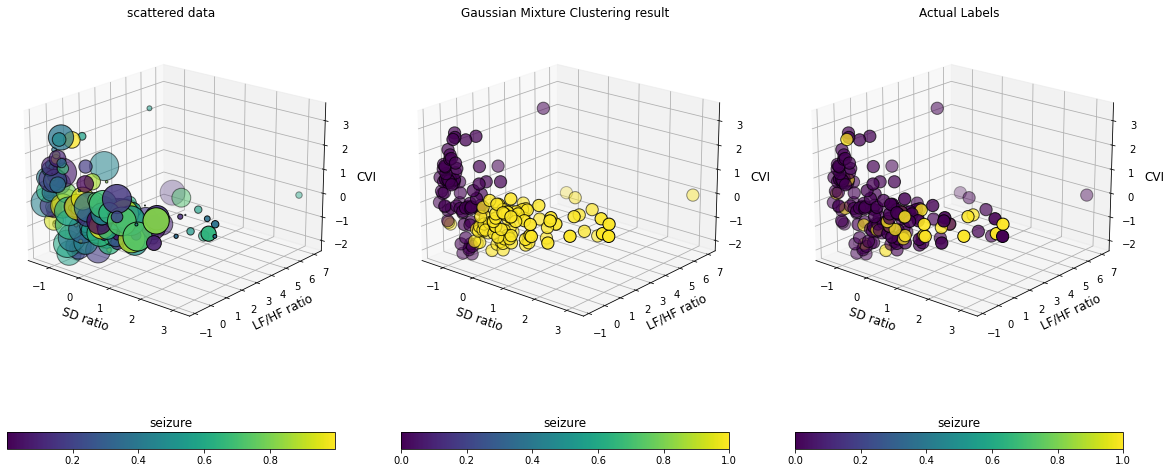

In [7]:
#scatterplot of data 
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
img1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=np.random.rand(176), edgecolor="k",s=(30 * np.random.rand(176))**2)        #c is the color which is based on labels so it show the clusters
ax1.view_init(20, -50)
ax1.set_xlabel(names[0], fontsize=12)       
ax1.set_ylabel(names[1], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("scattered data", fontsize=12)
clb1 = fig.colorbar(img1, orientation="horizontal")
clb1.ax.set_title('seizure')

#plot the clustering result(prediction of model)
ax1 = fig.add_subplot(1, 3, 2, projection='3d')
img1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=prediction, edgecolor="k",s=150)                        #c is the color which is based on labels so it show the clusters
ax1.view_init(20, -50)
ax1.set_xlabel(names[0], fontsize=12)       
ax1.set_ylabel(names[1], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("Gaussian Mixture Clustering result", fontsize=12)
clb1 = fig.colorbar(img1, orientation="horizontal")
clb1.ax.set_title('seizure')

#plot clusters based on labeled annotation
ax2 = fig.add_subplot(1, 3, 3, projection='3d')
img2 = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor="k", s=150)
ax2.view_init(20, -50)
ax2.set_xlabel(names[0], fontsize=12)
ax2.set_ylabel(names[1], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels", fontsize=12)
clb2 = fig.colorbar(img2, orientation="horizontal")
clb2.ax.set_title('seizure')

**EVALUATION**  
**The adjusted rand index** is an evaluation metric that is used to measure the similarity between two clustering by considering all the pairs of the n_samples and calculating the counting pairs of the assigned in the same or different clusters in the actual and predicted clustering. Perfect labeling is scored 1.                     

**The Rand index** is different from the adjusted rand index. Rand index does find the similarity between two clustering by considering all the pairs of the n_sample but it ranges from 0 to 1. whereas adjusted rand index ranges from -1 to 1. 

**Mutual Information** between two clusters is a measure of the similarity between two labels of the same data. That is it is used to check the mutual information in the actual label target vs the predicted model label. 

Perfect labeling is scored 1.0.       
Poorly agreeing labels have lower scores, and for the adjusted Rand index the score will be negative or close to zero. 

In [8]:
#evaluation
print(metrics.adjusted_rand_score(y, prediction))
print(metrics.rand_score(y, prediction))
print(metrics.mutual_info_score(y, prediction))

-0.013048106526602966
0.4974025974025974
0.016430767279633038


**CLUSTERING RESULT FOR EACH FEATURE**                
**Silhouette score aka Silhouette Coefficient** is an evaluation metric that results in the range of -1 to 1. A score near 1 signifies the best importance that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The score near -1 signifies the least or worst importance of the data point. A score near 0 signifies overlapping clusters. 

**Davies-Bouldin Index score** is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters that are farther apart and less dispersed will result in a better score. The minimum score is 0, with lower values indicating better clustering.

In [13]:
check_feature = X[:,0]                     #choose which feature we want to check  or we can use all features
feature = check_feature.reshape(-1,1)
print(silhouette_score(feature, prediction))       # choose one of the features
print(silhouette_score(X, prediction))             #choose all features
print(davies_bouldin_score(feature, prediction))

0.4641947507736303
0.29910749235088896
0.6547468468362114
